### Importar dados 

Primeiramente vamos importar os dados com os testes feitos, trata-los e assim realizar uma análise sobre os pontos mais importantes.

In [37]:
import pandas as pd
import numpy as np

data_url = 'tests.csv'
dome_data = pd.read_csv(data_url)
dome_data

,Unnamed: 0,user_msg,expected_intent,expected_class,expected_attributes,expected_filter_attributes,processed_attributes,processed_filters,find_entity,find_intent
0,0,"add student with name=anderson martins gomes, ...",ADD,student,"{'name': 'Anderson Martins Gomes', 'age': '20'}",NaN,"{'name': 'anderson martins gomes', 'age': '20'}",{},student,CREATE
1,1,"add subject with name=brazilian history, descr...",ADD,subject,"{'name': 'Brazilian History', 'description': '...",NaN,"{'name': 'brazilian history', 'history': 'hist...",{},subject,CREATE
2,2,"add teacher with name=paulo henrique, age=65, ...",ADD,teacher,"{'name': 'Paulo Henrique', 'age': '65', 'email...",NaN,"{'name': 'paulo henrique', 'age': '65', 'email...",{},teacher,CREATE
3,3,"add subject with name=math, description=the be...",ADD,subject,"{'name': 'Math', 'description': 'The best subj...",NaN,"{'name': 'math', 'description': 'the best subj...",{},subject,CREATE
4,4,"add subject with name=math, description='the b...",ADD,subject,"{'name': 'Math', 'description': 'The best subj...",NaN,"{'name': 'math', 'description': ""'the best sub...",{},subject,CREATE
...,...,...,...,...,...,...,...,...,...,...
454,466,add an invoice with value=100,ADD,invoice,{'value': '100'},NaN,{'value': '100'},{},invoice,CREATE
455,467,get all invoice,READ,invoice,NaN,NaN,{},{},invoice,READ
456,468,add car with license=2020,ADD,car,{'license': '2020'},NaN,{'license': '2020'},{},car,CREATE
457,469,add car with color=black,ADD,car,{'color': 'black'},NaN,{'color': 'black'},{},car,CREATE


### Pós processamento dos dados

Com os testes feitos iremos tratar a tabela para realizar a análise. 

Primeiramente, para fins de obtenção de resultados, iremos passar um algoritimo que verifique quantos atributos/filters (se existirem) são requeridos em cada linha. Isso irá nos indicar até quantos atributos o sistema consegue ter uma boa precisão.

Por o dataset ainda conter diversas incoerências principalmente na questão de letras maiúsculas e minusculas, como na primeira linha na qual a mensagem possui somente letras minusculas porém em expected attributes existem letras maiúsculas, todas as linhas de processed e expected para attributes e filters serão 'normalizadas' e ficarão minúsculas.

Além disso iremos substituir os valores nulos das colunas expected attributes e expected filter por chaves vazias, para que os valores se encaixem com a resposta 'nula' da API, que são chaves vazias.

É importante também mudar todos os valores 'ADD' na coluna de expected intent para que se adequem a como a API retorna (CREATE).

Por fim iremos remover colunas indesejadas.

In [39]:
import ast

def count_keys(cell):
    if pd.isnull(cell): 
        return 0
    try:
        dictionary = ast.literal_eval(cell) 
        if isinstance(dictionary, dict):
            return len(dictionary.keys()) 
    except (ValueError, SyntaxError):
        return 0 
    return 0

dome_data['total_attributes'] = dome_data['expected_attributes'].apply(count_keys) + dome_data['expected_filter_attributes'].apply(count_keys)
dome_data.head(10)

,Unnamed: 0,user_msg,expected_intent,expected_class,expected_attributes,expected_filter_attributes,processed_attributes,processed_filters,find_entity,find_intent,total_attributes
0,0,"add student with name=anderson martins gomes, ...",ADD,student,"{'name': 'Anderson Martins Gomes', 'age': '20'}",NaN,"{'name': 'anderson martins gomes', 'age': '20'}",{},student,CREATE,2
1,1,"add subject with name=brazilian history, descr...",ADD,subject,"{'name': 'Brazilian History', 'description': '...",NaN,"{'name': 'brazilian history', 'history': 'hist...",{},subject,CREATE,2
2,2,"add teacher with name=paulo henrique, age=65, ...",ADD,teacher,"{'name': 'Paulo Henrique', 'age': '65', 'email...",NaN,"{'name': 'paulo henrique', 'age': '65', 'email...",{},teacher,CREATE,3
3,3,"add subject with name=math, description=the be...",ADD,subject,"{'name': 'Math', 'description': 'The best subj...",NaN,"{'name': 'math', 'description': 'the best subj...",{},subject,CREATE,2
4,4,"add subject with name=math, description='the b...",ADD,subject,"{'name': 'Math', 'description': 'The best subj...",NaN,"{'name': 'math', 'description': ""'the best sub...",{},subject,CREATE,2
5,5,add student name=anderson,ADD,student,{'name': 'Anderson'},NaN,{'name': 'anderson'},{},student,CREATE,1
6,6,get students with name anderson,READ,student,NaN,{'name': 'anderson'},{},{'name': 'anderson'},students,READ,1
7,7,show me the teachers,READ,teacher,NaN,NaN,{},{},teachers,READ,0
8,8,show teachers,READ,teacher,NaN,NaN,{},{},teachers,READ,0
9,9,show teacher,READ,teacher,NaN,NaN,{},{'teacher': ''},show,READ,0


In [40]:
dome_data.expected_attributes = dome_data.expected_attributes.str.lower()
dome_data.expected_filter_attributes = dome_data.expected_filter_attributes.str.lower()
dome_data.processed_attributes = dome_data.processed_attributes.str.lower()
dome_data.processed_filters = dome_data.processed_filters.str.lower()
dome_data.head(10)

,Unnamed: 0,user_msg,expected_intent,expected_class,expected_attributes,expected_filter_attributes,processed_attributes,processed_filters,find_entity,find_intent,total_attributes
0,0,"add student with name=anderson martins gomes, ...",ADD,student,"{'name': 'anderson martins gomes', 'age': '20'}",NaN,"{'name': 'anderson martins gomes', 'age': '20'}",{},student,CREATE,2
1,1,"add subject with name=brazilian history, descr...",ADD,subject,"{'name': 'brazilian history', 'description': '...",NaN,"{'name': 'brazilian history', 'history': 'hist...",{},subject,CREATE,2
2,2,"add teacher with name=paulo henrique, age=65, ...",ADD,teacher,"{'name': 'paulo henrique', 'age': '65', 'email...",NaN,"{'name': 'paulo henrique', 'age': '65', 'email...",{},teacher,CREATE,3
3,3,"add subject with name=math, description=the be...",ADD,subject,"{'name': 'math', 'description': 'the best subj...",NaN,"{'name': 'math', 'description': 'the best subj...",{},subject,CREATE,2
4,4,"add subject with name=math, description='the b...",ADD,subject,"{'name': 'math', 'description': 'the best subj...",NaN,"{'name': 'math', 'description': ""'the best sub...",{},subject,CREATE,2
5,5,add student name=anderson,ADD,student,{'name': 'anderson'},NaN,{'name': 'anderson'},{},student,CREATE,1
6,6,get students with name anderson,READ,student,NaN,{'name': 'anderson'},{},{'name': 'anderson'},students,READ,1
7,7,show me the teachers,READ,teacher,NaN,NaN,{},{},teachers,READ,0
8,8,show teachers,READ,teacher,NaN,NaN,{},{},teachers,READ,0
9,9,show teacher,READ,teacher,NaN,NaN,{},{'teacher': ''},show,READ,0


In [41]:
dome_data.expected_attributes = dome_data.expected_attributes.fillna('{}')
dome_data.expected_filter_attributes = dome_data.expected_filter_attributes.fillna('{}')
dome_data.head(10)

,Unnamed: 0,user_msg,expected_intent,expected_class,expected_attributes,expected_filter_attributes,processed_attributes,processed_filters,find_entity,find_intent,total_attributes
0,0,"add student with name=anderson martins gomes, ...",ADD,student,"{'name': 'anderson martins gomes', 'age': '20'}",{},"{'name': 'anderson martins gomes', 'age': '20'}",{},student,CREATE,2
1,1,"add subject with name=brazilian history, descr...",ADD,subject,"{'name': 'brazilian history', 'description': '...",{},"{'name': 'brazilian history', 'history': 'hist...",{},subject,CREATE,2
2,2,"add teacher with name=paulo henrique, age=65, ...",ADD,teacher,"{'name': 'paulo henrique', 'age': '65', 'email...",{},"{'name': 'paulo henrique', 'age': '65', 'email...",{},teacher,CREATE,3
3,3,"add subject with name=math, description=the be...",ADD,subject,"{'name': 'math', 'description': 'the best subj...",{},"{'name': 'math', 'description': 'the best subj...",{},subject,CREATE,2
4,4,"add subject with name=math, description='the b...",ADD,subject,"{'name': 'math', 'description': 'the best subj...",{},"{'name': 'math', 'description': ""'the best sub...",{},subject,CREATE,2
5,5,add student name=anderson,ADD,student,{'name': 'anderson'},{},{'name': 'anderson'},{},student,CREATE,1
6,6,get students with name anderson,READ,student,{},{'name': 'anderson'},{},{'name': 'anderson'},students,READ,1
7,7,show me the teachers,READ,teacher,{},{},{},{},teachers,READ,0
8,8,show teachers,READ,teacher,{},{},{},{},teachers,READ,0
9,9,show teacher,READ,teacher,{},{},{},{'teacher': ''},show,READ,0


In [42]:
dome_data['expected_intent'] = dome_data['expected_intent'].replace('ADD', 'CREATE')
dome_data.head(10)

,Unnamed: 0,user_msg,expected_intent,expected_class,expected_attributes,expected_filter_attributes,processed_attributes,processed_filters,find_entity,find_intent,total_attributes
0,0,"add student with name=anderson martins gomes, ...",CREATE,student,"{'name': 'anderson martins gomes', 'age': '20'}",{},"{'name': 'anderson martins gomes', 'age': '20'}",{},student,CREATE,2
1,1,"add subject with name=brazilian history, descr...",CREATE,subject,"{'name': 'brazilian history', 'description': '...",{},"{'name': 'brazilian history', 'history': 'hist...",{},subject,CREATE,2
2,2,"add teacher with name=paulo henrique, age=65, ...",CREATE,teacher,"{'name': 'paulo henrique', 'age': '65', 'email...",{},"{'name': 'paulo henrique', 'age': '65', 'email...",{},teacher,CREATE,3
3,3,"add subject with name=math, description=the be...",CREATE,subject,"{'name': 'math', 'description': 'the best subj...",{},"{'name': 'math', 'description': 'the best subj...",{},subject,CREATE,2
4,4,"add subject with name=math, description='the b...",CREATE,subject,"{'name': 'math', 'description': 'the best subj...",{},"{'name': 'math', 'description': ""'the best sub...",{},subject,CREATE,2
5,5,add student name=anderson,CREATE,student,{'name': 'anderson'},{},{'name': 'anderson'},{},student,CREATE,1
6,6,get students with name anderson,READ,student,{},{'name': 'anderson'},{},{'name': 'anderson'},students,READ,1
7,7,show me the teachers,READ,teacher,{},{},{},{},teachers,READ,0
8,8,show teachers,READ,teacher,{},{},{},{},teachers,READ,0
9,9,show teacher,READ,teacher,{},{},{},{'teacher': ''},show,READ,0


In [43]:
dome_data = dome_data.drop(dome_data.columns[0], axis=1)
dome_data.columns

Index(['user_msg', 'expected_intent', 'expected_class', 'expected_attributes',
       'expected_filter_attributes', 'processed_attributes',
       'processed_filters', 'find_entity', 'find_intent', 'total_attributes'],
      dtype='object')

### Análise

Iremos fazer duas análises: Uma que compara se as respostas de cada dado encontrado está exatamente igual ao esperado, e outra que mede a similaridade (entre 1 a 100) entre os resultados. Essa segunda opção é uma análise secundária que, por ser uma análise mais profunda, nos dará uma noção de o quanto o sistema entende o que queremos com a mensagem e não reduz os resultados à apenas certo ou errado. 



### Análise objetiva

Para a análise objetiva criaremos as colunas:

1. correct_intent (caso a intenção obtida seja igual à esperada, será atribuído True na coluna, caso não será atribuído False)
2. correct_entity (caso a entidade obtida seja igual à esperada, será atribuído True na coluna, caso não será atribuído False)
3. correct_attribute (caso a intenção obtida seja igual à esperada, será atribuído True na coluna, caso não será atribuído False)
4. correct_filter (caso a intenção obtida seja igual à esperada, será atribuído True na coluna, caso não será atribuído False)
5. correct_answer (caso todas as colunas anteriores sinalizem True, esta será True, caso não, será False)

Com isso iremos extrair:

1. Quantidade de acertos para cada dado
2. Quantidade de acertos totais
3. Precisão de acertos para cada dado
4. Precisão de acertos totais
5. Quantidade de acertos para cada operação CRUD
6. Precisão para cada operação CRUD
7. Quantidade de acertos para cada dado e para cada operação CRUD
8. Precisão para cada dado e para cada operação CRUD
9. Precisão para cada número de atributos
10. Precisão de cada dado para cada número de atributos


In [46]:
objective_analysis = pd.DataFrame()
objective_analysis['user_msg'] = dome_data.user_msg
objective_analysis['intent'] = dome_data.expected_intent
objective_analysis['att_qnt'] = dome_data.total_attributes
objective_analysis['correct_intent'] = dome_data.expected_intent == dome_data.find_intent
objective_analysis['correct_entity'] = dome_data.expected_class == dome_data.find_entity
objective_analysis['correct_attributes'] = dome_data.expected_attributes == dome_data.processed_attributes
objective_analysis['correct_filters'] = dome_data.expected_filter_attributes == dome_data.processed_filters
objective_analysis['correct_answer'] = objective_analysis.correct_intent & objective_analysis.correct_entity & objective_analysis.correct_attributes & objective_analysis.correct_filters
objective_analysis.head(10)


,user_msg,intent,att_qnt,correct_intent,correct_entity,correct_attributes,correct_filters,correct_answer
0,"add student with name=anderson martins gomes, ...",CREATE,2,True,True,True,True,True
1,"add subject with name=brazilian history, descr...",CREATE,2,True,True,False,True,False
2,"add teacher with name=paulo henrique, age=65, ...",CREATE,3,True,True,False,True,False
3,"add subject with name=math, description=the be...",CREATE,2,True,True,True,True,True
4,"add subject with name=math, description='the b...",CREATE,2,True,True,False,True,False
5,add student name=anderson,CREATE,1,True,True,True,True,True
6,get students with name anderson,READ,1,True,False,True,True,False
7,show me the teachers,READ,0,True,False,True,True,False
8,show teachers,READ,0,True,False,True,True,False
9,show teacher,READ,0,True,False,True,False,False


In [47]:
cor_intent = objective_analysis['correct_intent'].sum()
cor_entity = objective_analysis['correct_entity'].sum()
cor_att = objective_analysis['correct_attributes'].sum()
cor_filter = objective_analysis['correct_filters'].sum()
cor_total = objective_analysis['correct_answer'].sum()

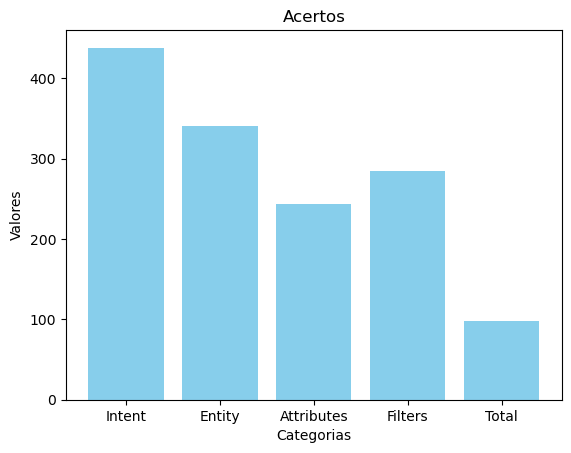

In [48]:
import matplotlib.pyplot as plt

plt.bar(['Intent', 'Entity', 'Attributes', 'Filters', 'Total'], [cor_intent, cor_entity, cor_att, cor_filter, cor_total], color='skyblue')

plt.title('Acertos')
plt.xlabel('Categorias')
plt.ylabel('Valores')

plt.show()

### Acertos por quantidade de atributos
Agora que extraimos os acertos para cada tipo de dado iremos verificar os acertos para cada quantidade de atributos (filtros + atributos).
Iremos primeiro verificar a variação de quantidade de atributos e em seguida verificar quantos 'true' cada variação obtem.

In [50]:
objective_analysis.att_qnt.value_counts()

att_qnt
1    161
2    160
0    109
3     17
4      8
5      3
7      1
Name: count, dtype: int64

In [51]:
result = objective_analysis.groupby('att_qnt')['correct_answer'].sum().reset_index()
result.columns = ['att_qnt', 'correct_answer']
print(result)

   att_qnt  correct_answer
0        0              26
1        1              49
2        2              20
3        3               2
4        4               1
5        5               0
6        7               0


Como o número de linhas para cada att_qnt varia (ex: existe apenas uma linha com 7 atributos enquanto com 0 existem 109), iremos extrair informações mais reveladoras se levarmos em conta a porcentagem de acertos (casos_certos/casos_totais)

In [53]:
total_counts = objective_analysis['att_qnt'].value_counts().reset_index()
total_counts.columns = ['att_qnt', 'total_count']

result_percentage = pd.merge(result, total_counts, on='att_qnt')

result_percentage['accuracy_percentage'] = (result_percentage['correct_answer'] / result_percentage['total_count']) * 100

print(result_percentage)

   att_qnt  correct_answer  total_count  accuracy_percentage
0        0              26          109            23.853211
1        1              49          161            30.434783
2        2              20          160            12.500000
3        3               2           17            11.764706
4        4               1            8            12.500000
5        5               0            3             0.000000
6        7               0            1             0.000000


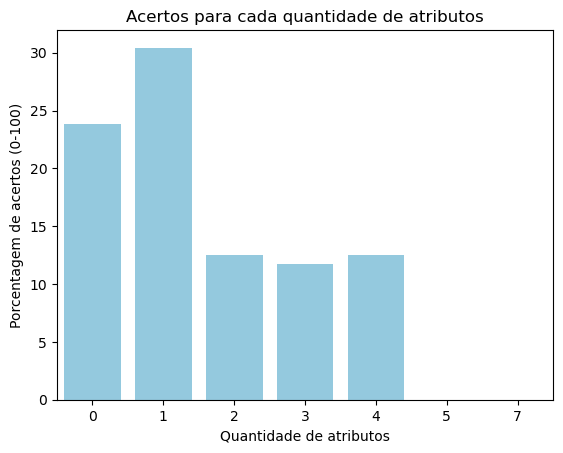

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=result_percentage, x='att_qnt', y='accuracy_percentage', color='skyblue')

plt.title('Acertos para cada quantidade de atributos')
plt.xlabel('Quantidade de atributos')
plt.ylabel('Porcentagem de acertos (0-100)')

plt.show()

### Fazendo o mesmo para cada operação crud

In [67]:
objective_analysis.intent.value_counts()

intent
CREATE    169
READ      143
UPDATE     99
DELETE     48
Name: count, dtype: int64

In [91]:
result_intent = objective_analysis.groupby('intent')['correct_answer'].sum().reset_index()
result_intent.columns = ['intent', 'correct_answer']
print(result_intent)

   intent  correct_answer
0  CREATE              36
1  DELETE              15
2    READ              39
3  UPDATE               8


In [95]:
total_counts_intent = objective_analysis['intent'].value_counts().reset_index()
total_counts_intent.columns = ['intent', 'total_count']
result_intent_percentage = pd.merge(result_intent, total_counts_intent, on='intent')
result_intent_percentage['accuracy_percentage'] = (result_intent_percentage['correct_answer'] / result_intent_percentage['total_count']) * 100
print(result_intent_percentage)

   intent  correct_answer  total_count  accuracy_percentage
0  CREATE              36          169            21.301775
1  DELETE              15           48            31.250000
2    READ              39          143            27.272727
3  UPDATE               8           99             8.080808


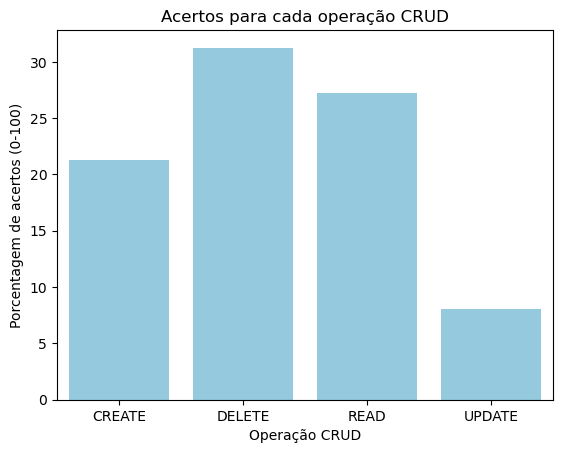

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=result_intent_percentage, x='intent', y='accuracy_percentage', color='skyblue')

plt.title('Acertos para cada operação CRUD')
plt.xlabel('Operação CRUD')
plt.ylabel('Porcentagem de acertos (0-100)')

plt.show()

### Precisão de acertos para cada tipo de dado

Agora iremos analisar o quanto a operação CRUD interferiu na precisão de cada tipo de dado (intent, entity, attribute e filter)
Faremos isso também para quantidade de atributos.

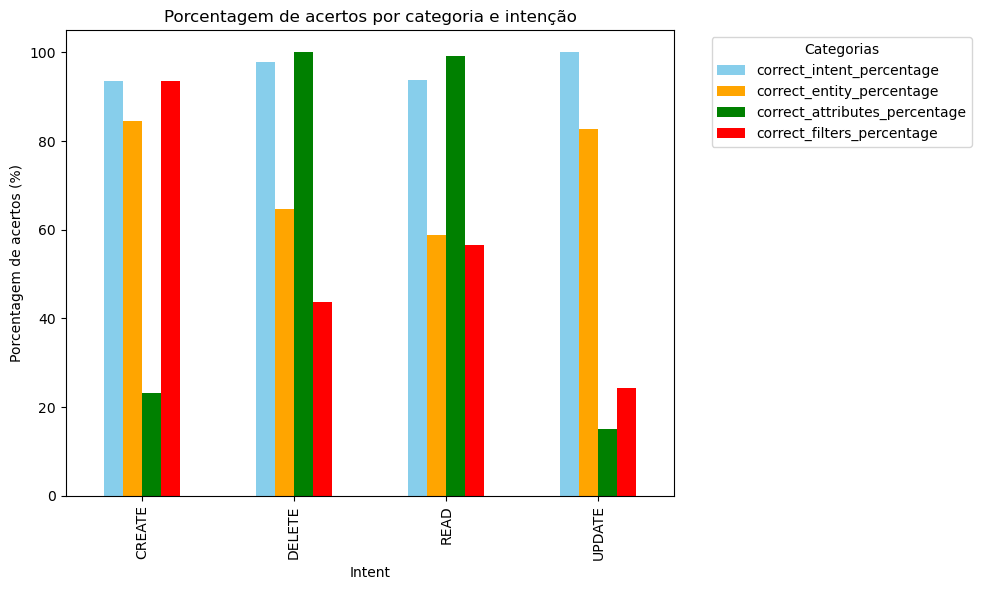

In [133]:
intent_totals = objective_analysis.groupby("intent").size().reset_index(name="total_count")

columns_to_count = ["correct_intent", "correct_entity", "correct_attributes", "correct_filters"]
grouped_data = objective_analysis.groupby("intent")[columns_to_count].sum().reset_index()

grouped_data = pd.merge(grouped_data, intent_totals, on="intent")
for col in columns_to_count:
    grouped_data[f"{col}_percentage"] = (grouped_data[col] / grouped_data["total_count"]) * 100

percentage_columns = [f"{col}_percentage" for col in columns_to_count]
plot_data = grouped_data.set_index("intent")[percentage_columns]

plot_data.plot(kind="bar", figsize=(10, 6), stacked=False, color=["skyblue", "orange", "green", "red"])

plt.title("Porcentagem de acertos por categoria e intenção")
plt.xlabel("Intent")
plt.ylabel("Porcentagem de acertos (%)")
plt.legend(title="Categorias", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

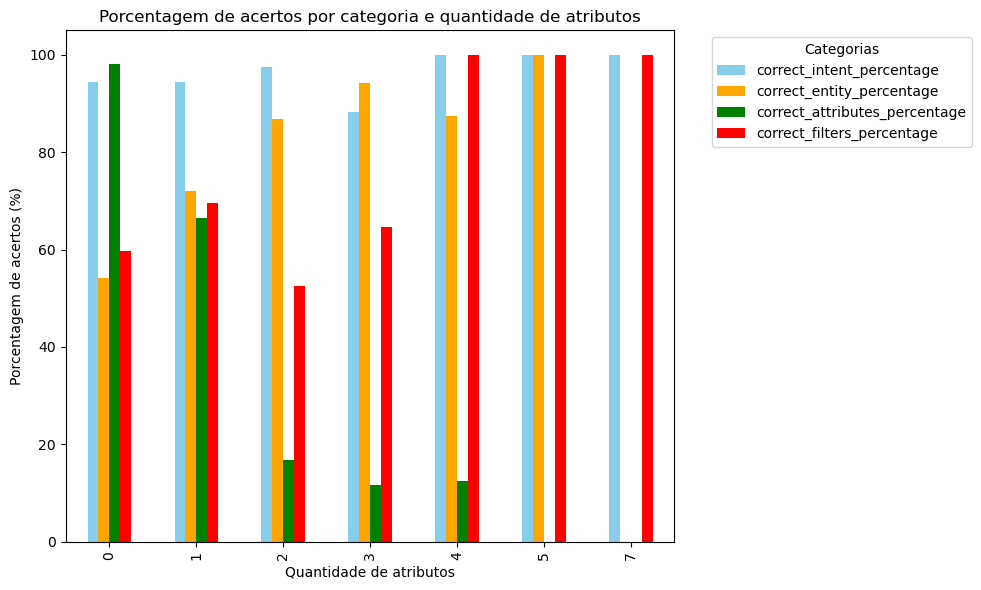

In [143]:
att_totals = objective_analysis.groupby("att_qnt").size().reset_index(name="total_count")

columns_to_count = ["correct_intent", "correct_entity", "correct_attributes", "correct_filters"]
grouped_data = objective_analysis.groupby("att_qnt")[columns_to_count].sum().reset_index()
grouped_data = pd.merge(grouped_data, att_totals, on="att_qnt")
for col in columns_to_count:
    grouped_data[f"{col}_percentage"] = (grouped_data[col] / grouped_data["total_count"]) * 100
percentage_columns = [f"{col}_percentage" for col in columns_to_count]
plot_data = grouped_data.set_index("att_qnt")[percentage_columns]

plot_data.plot(kind="bar", figsize=(10, 6), stacked=False, color=["skyblue", "orange", "green", "red"])

plt.title("Porcentagem de acertos por categoria e quantidade de atributos")
plt.xlabel("Quantidade de atributos")
plt.ylabel("Porcentagem de acertos (%)")
plt.legend(title="Categorias", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()